# 데이터 전처리
---

### 모듈 임포트

In [1]:
# module 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 차트 기본 설정

In [2]:
plt.rcParams["figure.figsize"] = (14,14)

### 피처 중요도 함수

In [3]:
def plot_feature_importances(model, feature):
    n_features = len(feature)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature)
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

### 데이터 불러오기

In [4]:
# dataset 로딩
x_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity.csv').sort_values(by='acc_id', ascending=True)
y_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)['label']

In [5]:
x_data = x_load
y_data = y_load

### 전처리

#### SCALING

In [6]:
#횟수 데이터 복원
x_data.loc[:,'duel_cnt':] = (x_data.loc[:,'duel_cnt':] - x_data.loc[:,'duel_cnt':].min())/(x_data.loc[:, 'duel_cnt':][x_data.loc[:, 'duel_cnt':] > x_data.loc[:,'duel_cnt':].min()].min() - x_data.loc[:,'duel_cnt':].min())

In [52]:
#play time scaling = 0 to 100
x_data.play_time = (x_data.play_time -x_data.play_time.min())/(x_data.play_time[x_data.play_time > x_data.play_time.min()].min() - x_data.play_time.min())
# x_data.play_time = (x_data.play_time - x_data.play_time.min())/(x_data.play_time.max() - x_data.play_time.min()) * 100

In [8]:
#game combat time scaling = 0 to 100
x_data.game_combat_time = (x_data.game_combat_time -x_data.game_combat_time.min())/(x_data.game_combat_time[x_data.game_combat_time > x_data.game_combat_time.min()].min() - x_data.game_combat_time.min())


In [9]:
#exp scaling = 0 to 100
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
    x_data[value] = 10000 * (x_data[value] - x_data[value].min())/(x_data[value].max() - x_data[value].min())

In [10]:
# pd.crosstab(index=x_data.duel_win/(x_data.duel_cnt + 0.0001), columns='count')

In [11]:
# sns.distplot(pd.crosstab(index= np.exp(100*round(x_data.duel_win/(x_data.duel_cnt + 0.0000000000000000000000001), 3) + 1), columns='count').iloc[2:], hist=True, kde_kws={"clip": [0,100]})

In [12]:
# sns.distplot(pd.crosstab(index= x_data.duel_cnt + round(x_data.duel_win/(x_data.duel_cnt + 0.0000000000000000000000001), 3), columns='count').iloc[6:])

In [13]:
# x_data.duel_win/(x_data.duel_cnt + 0.0001)

#### Feature Engineering

##### 결투, 전장

In [14]:
#결투승률추가
x_data['duel_winning_rate'] = x_data.duel_win/(x_data.duel_cnt + 0.0001)

In [15]:
#전장승률추가
x_data['partybattle_winning_rate'] = x_data.partybattle_win/(x_data.partybattle_cnt + 0.0001)

In [16]:
#솔로 인던 완료율
#라이트 인던 완료율
#숙련 인던 완료율
#라이트/숙련 인던 완료율
#레이드 완료율
#라이트 레이드 완료율
#바람 평야 완료율
temp = ['inzone_solo', 'inzone_light', 'inzone_skilled', 'inzone_normal', 'raid', 'raid_light', 'bam']
for value in temp:
    x_data['rate_' + value] = x_data['cnt_clear_' + value]/(x_data['cnt_enter_' + value] + 0.0001)

In [17]:
#플레이 타임 대비 참여횟수
temp = ['inzone_solo', 'inzone_light', 'inzone_skilled', 'inzone_normal', 'raid', 'raid_light', 'bam']
for value in temp:
    x_data['rate_' + value + '_play_time'] = x_data['cnt_enter_' + value] / (x_data['play_time'] + 0.0000001)

##### 전투시간

In [18]:
# 플레이 타임 대비 전투 시간

x_data['rate_game_combat_time_play_time'] = x_data['game_combat_time'] / (x_data['play_time'] + 0.0000001)

In [19]:
# 전투시간 대비 플레이 시간
x_data['rate__play_time_game_combat_time'] = x_data['play_time'] / (x_data['game_combat_time'] + 0.0000001)

In [20]:
# 전투시간 > 1.7
# x_data['bigger_game_combat_time_1_7'] = x_data['game_combat_time'] > 1.7

##### 채팅

In [21]:
#채팅횟수의 합
x_data['sum_chat'] = x_data['normal_chat'] + x_data['whisper_chat'] + x_data['district_chat'] + x_data['party_chat'] + x_data['guild_chat'] + x_data['faction_chat']

In [22]:
#채팅 비율
temp = ['normal_chat', 'whisper_chat', 'district_chat', 'party_chat', 'guild_chat', 'faction_chat']
for value in temp:
    x_data['rate_' + value] = x_data[value]/(x_data['sum_chat'] + 0.0001)

In [23]:
#채팅 횟수 차이
temp = ['normal_chat', 'whisper_chat', 'district_chat', 'party_chat', 'guild_chat', 'faction_chat']
for i in [0,1,2,3,4]:
    for j in range(i+1, 6):
        x_data['minus_' + temp[i] + '_' + temp[j]] = x_data[temp[i]] - x_data[temp[j]]

##### 경험치

In [24]:
#플레이 타임 대비 경험치 획득량
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
    x_data['rate_' + value + '_play_time'] = x_data[value] / (x_data['play_time'] + 0.0000001)

In [25]:
#경험치 획득 총량
x_data['sum_exp'] = x_data['npc_exp'] + x_data['npc_hongmun'] + x_data['quest_exp'] + x_data['quest_hongmun'] + x_data['item_hongmun']

In [26]:
#경험치 비율
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
        x_data['rate_' + value] = x_data[value]/(x_data['sum_exp'] + 0.0001)

##### buffitem

In [27]:
# 버프아이템 > 600
# x_data['bigger_buff_item_17'] = x_data['cnt_use_buffitem'] > 600

##### play time square

In [28]:
# x_data['play_time_square'] = x_data['play_time'] ** 2

In [29]:
# x_data['game_combat_time_square'] = x_data['game_combat_time'] ** 2

In [30]:
# x_data['cnt_dt_square'] =  x_data['cnt_dt'] ** 2

In [31]:
# x_data['play_time_by_cnt_dt'] = x_data['play_time'] * x_data['cnt_dt']

In [32]:
# x_data['play_time_by_game_combat_time'] = x_data['play_time'] * x_data['game_combat_time']

In [33]:
# x_data['cnt_dt_by_game_combat_time'] = x_data['cnt_dt'] * x_data['game_combat_time']

##### 주차별로 늘이기

In [34]:
x_data_temp = x_data[x_data.wk == 1]
x_data_temp.columns = x_data_temp.columns.map(lambda v: v + '_1' if v != 'acc_id' else v)

for i in range(2, 9):
    x_data_i = x_data[x_data.wk == i]
    x_data_i.columns = x_data_i.columns.map(lambda v: v + '_' + str(i) if v != 'acc_id' else v)
    x_data_temp = pd.merge(x_data_temp, x_data_i, how = 'outer', on = 'acc_id')

x_data = x_data_temp.fillna(0).sort_values(by='acc_id', ascending=True)

In [35]:
x_data = x_data.drop(['acc_id'], axis = 1)

In [36]:
x_data = x_data.drop(['wk_1','wk_2','wk_3','wk_4','wk_5','wk_6','wk_7','wk_8'], axis = 1)

---
# 훈련, 테스트 셋 구분
---

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

---
# 모델 - 전체
---

In [38]:
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_depth=20)

In [39]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

테스트 세트 정확도: 0.731


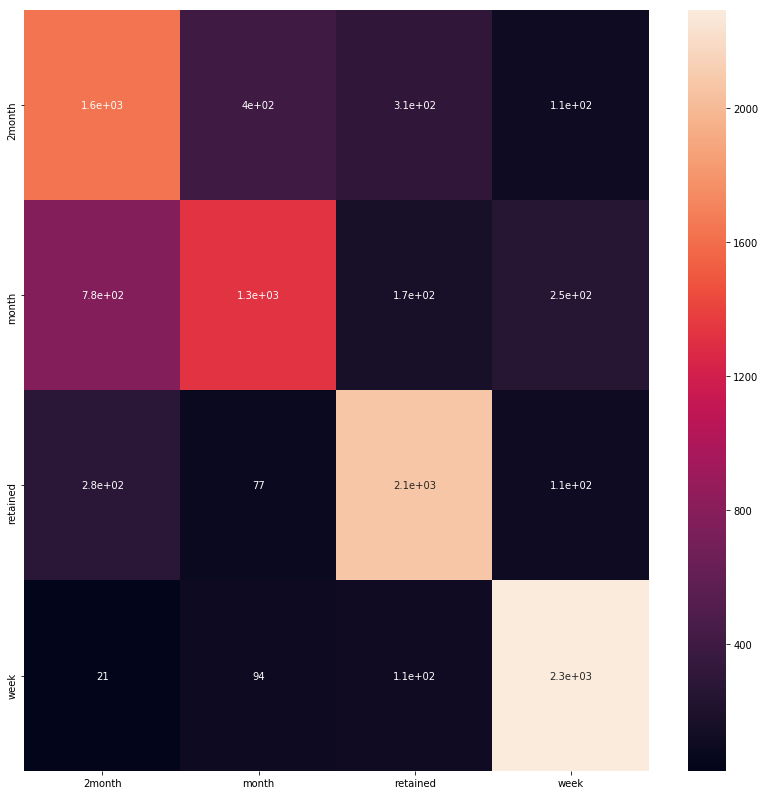

In [41]:
cm = pd.DataFrame(confusion_matrix(y_test, forest.predict(x_test)), columns=forest.classes_, index=forest.classes_)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, forest.predict(x_test)))

             precision    recall  f1-score   support

     2month       0.60      0.67      0.63      2442
      month       0.70      0.52      0.60      2518
   retained       0.78      0.82      0.80      2523
       week       0.83      0.91      0.87      2517

avg / total       0.73      0.73      0.73     10000



In [43]:
# plot_feature_importances(forest, x_test.columns)

---
# MODEL 1
---

In [44]:
y_data_layer1 = y_data.map(lambda value: "MON" if value == "month" or value == "2month" else value)

In [45]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_data, y_data_layer1, test_size=0.1, random_state=1)

In [46]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_depth=20)

In [47]:
forest1.fit(x_train_layer1, y_train_layer1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
print("테스트 세트 정확도: {:.3f}".format(forest1.score(x_test_layer1, y_test_layer1)))

테스트 세트 정확도: 0.842


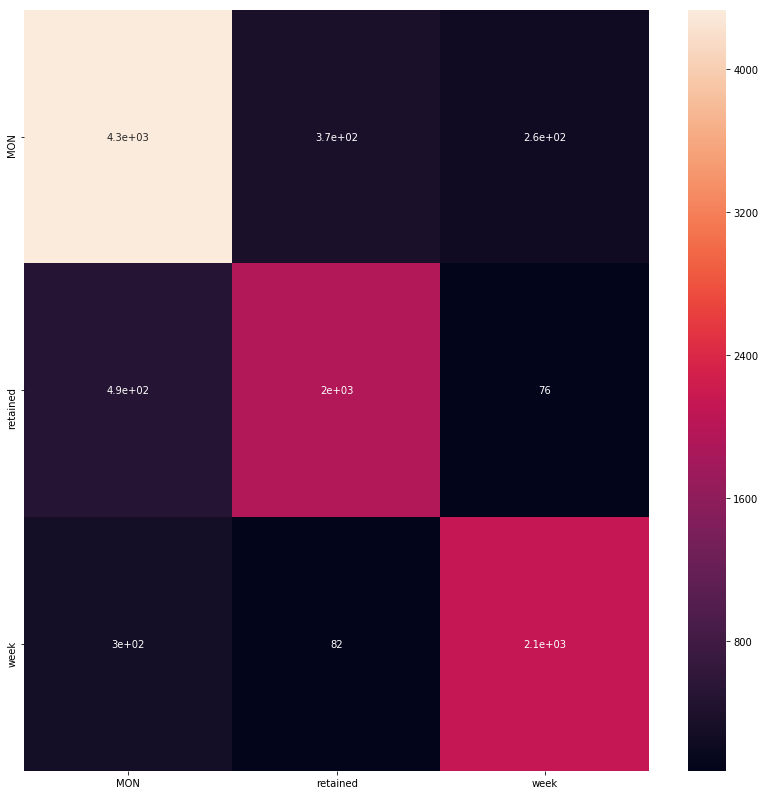

In [49]:
cm = pd.DataFrame(confusion_matrix(y_test_layer1, forest1.predict(x_test_layer1)), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_test_layer1, forest1.predict(x_test_layer1)))

             precision    recall  f1-score   support

        MON       0.84      0.87      0.86      4960
   retained       0.81      0.77      0.79      2523
       week       0.87      0.85      0.86      2517

avg / total       0.84      0.84      0.84     10000



In [51]:
# plot_feature_importances(forest1, x_test_layer1.columns)

# MODEL 2

In [52]:
custom_filter = [v[0] or v[1] for v in zip(list((y_data == 'month').values), list((y_data == '2month').values))]
x_data_layer2 = x_data[custom_filter]
y_data_layer2 = y_data[custom_filter]

In [53]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

In [54]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=100, n_jobs=-1, max_depth=20, class_weight={'month':1.3, '2month':1})

In [55]:
forest2.fit(x_train_layer2, y_train_layer2)

RandomForestClassifier(bootstrap=True,
            class_weight={'month': 1.3, '2month': 1}, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [56]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_test_layer2, y_test_layer2)))

테스트 세트 정확도: 0.706


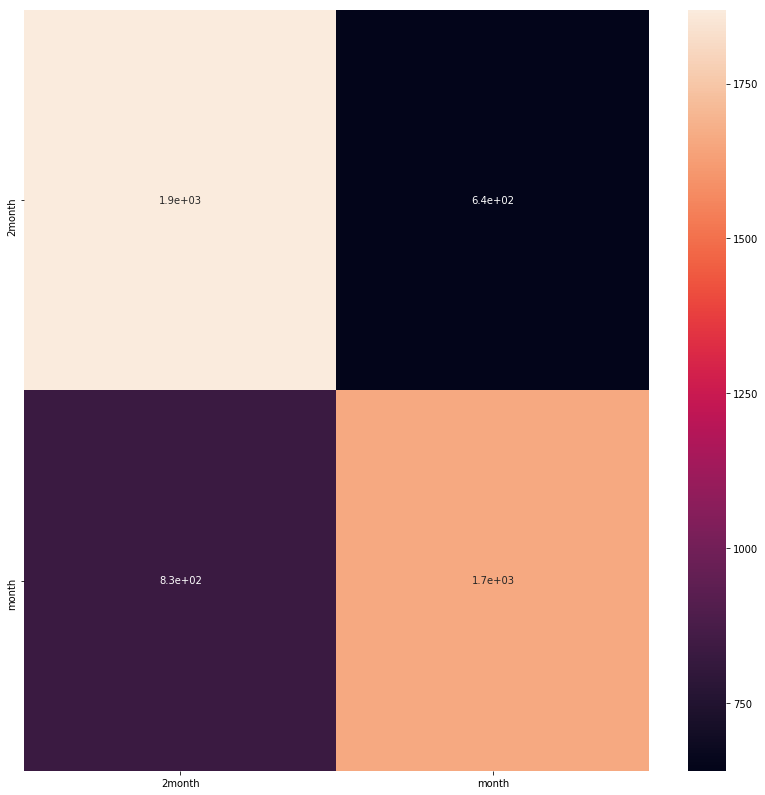

In [57]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, forest2.predict(x_test_layer2)), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test_layer2, forest2.predict(x_test_layer2)))

             precision    recall  f1-score   support

     2month       0.69      0.74      0.72      2510
      month       0.72      0.67      0.69      2490

avg / total       0.71      0.71      0.71      5000



In [59]:
# plot_feature_importances(forest2, x_test_layer2.columns)

In [60]:
# sns.scatterplot(x_train_layer2.game_combat_time, y_train_layer2.values)

In [61]:
x_data.shape

(100000, 696)

In [62]:
x_data

,cnt_dt_1,play_time_1,npc_exp_1,npc_hongmun_1,quest_exp_1,quest_hongmun_1,item_hongmun_1,game_combat_time_1,get_money_1,duel_cnt_1,...,rate_npc_hongmun_play_time_8,rate_quest_exp_play_time_8,rate_quest_hongmun_play_time_8,rate_item_hongmun_play_time_8,sum_exp_8,rate_npc_exp_8,rate_npc_hongmun_8,rate_quest_exp_8,rate_quest_hongmun_8,rate_item_hongmun_8
66075,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000009,0.015526,0.002892,0.000000,11916.968645,0.185072,0.000406,0.686638,0.127884,0.000000
0,3.0,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.023543,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
46302,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.0,29202.999999,90.312716,2.182794,1235.712206,389.481804,2.675048,9704.0,-0.023524,0.0,...,0.000000,0.000000,0.000844,0.000000,7.130980,0.000000,0.000000,0.000000,0.999986,0.000000
33707,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.003709,0.000000,0.000000,4.368991,0.059314,0.000000,0.940663,0.000000,0.000000
2,7.0,21405.999999,0.000000,4.700689,0.000000,8.720044,6.687621,9549.0,-0.023504,0.0,...,0.000011,0.000000,0.000949,0.000000,5.306030,0.000000,0.011126,0.000000,0.988855,0.000000
74264,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,7.0,544802.999974,3112.253209,8.677709,9183.792608,1687.071907,0.000000,136669.0,-0.023301,0.0,...,0.000254,0.000000,0.000158,0.000235,96.699643,0.000000,0.392789,0.000000,0.244127,0.363083


In [63]:
# x_data.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity_704.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity_704.csv'

---
# 리얼 테스트
---

In [77]:
# 테스트 데이터 로드
x_test = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_activity.csv').sort_values(by='acc_id', ascending=True)

### 전처리

#### SCALING

In [78]:
#횟수 데이터 복원
x_test.loc[:,'duel_cnt':] = abs(np.round((x_test.loc[:,'duel_cnt':] - x_data.loc[:,'duel_cnt':].min())/(x_data.loc[:, 'duel_cnt':][x_data.loc[:, 'duel_cnt':] > x_data.loc[:,'duel_cnt':].min()].min() - x_data.loc[:,'duel_cnt':].min())))

In [79]:
#play time scaling = 0 to 100
x_test.play_time = (x_test.play_time - x_data.play_time.min())#/(x_data.play_time[x_data.play_time > x_data.play_time.min()].min() - x_data.play_time.min())
# x_data.play_time = (x_data.play_time - x_data.play_time.min())/(x_data.play_time.max() - x_data.play_time.min()) * 100

In [80]:
pd.crosstab(index=x_test.play_time, columns='count')

col_0,count
play_time,
-0.661657,8
-0.661648,3
-0.661638,2
-0.661628,3
-0.661618,2
-0.661608,4
-0.661598,2
-0.661588,7
-0.661578,2


In [21]:
#game combat time scaling = 0 to 100
x_test.game_combat_time = np.round((x_test.game_combat_time -x_data.game_combat_time.min())/(x_data.game_combat_time[x_data.game_combat_time > x_data.game_combat_time.min()].min() - x_data.game_combat_time.min()))


In [22]:
#exp scaling = 0 to 100
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
    x_test[value] = 10000 * np.round((x_test[value] - x_data[value].min()))/np.round((x_data[value].max() - x_data[value].min()))

In [23]:
# pd.crosstab(index=x_data.duel_win/(x_data.duel_cnt + 0.0001), columns='count')

In [24]:
# sns.distplot(pd.crosstab(index= np.exp(100*round(x_data.duel_win/(x_data.duel_cnt + 0.0000000000000000000000001), 3) + 1), columns='count').iloc[2:], hist=True, kde_kws={"clip": [0,100]})

In [25]:
# sns.distplot(pd.crosstab(index= x_data.duel_cnt + round(x_data.duel_win/(x_data.duel_cnt + 0.0000000000000000000000001), 3), columns='count').iloc[6:])

In [26]:
# x_data.duel_win/(x_data.duel_cnt + 0.0001)

In [27]:
x_test

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
47383,7,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,3,372.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47381,5,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,2,351.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47380,4,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,5,712.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47379,3,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,3,381.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47382,6,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,2,246.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47384,8,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,4,510.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
47378,2,0002a56a036206aea3a6c6ebc985df4a2d1987b562e7f0...,1,248.0,-0.000000,0.000000,0.000000,208.333333,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
165181,2,0003bfdebe2b5d46217e8fa5ab0f33cf186fb558435f20...,1,711.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
165182,3,0003bfdebe2b5d46217e8fa5ab0f33cf186fb558435f20...,1,169.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
165180,1,0003bfdebe2b5d46217e8fa5ab0f33cf186fb558435f20...,1,152.0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0


#### Feature Engineering

##### 결투, 전장

In [13]:
#결투승률추가
x_data['duel_winning_rate'] = x_data.duel_win/(x_data.duel_cnt + 0.0001)

In [14]:
#전장승률추가
x_data['partybattle_winning_rate'] = x_data.partybattle_win/(x_data.partybattle_cnt + 0.0001)

In [15]:
#솔로 인던 완료율
#라이트 인던 완료율
#숙련 인던 완료율
#라이트/숙련 인던 완료율
#레이드 완료율
#라이트 레이드 완료율
#바람 평야 완료율
temp = ['inzone_solo', 'inzone_light', 'inzone_skilled', 'inzone_normal', 'raid', 'raid_light', 'bam']
for value in temp:
    x_data['rate_' + value] = x_data['cnt_clear_' + value]/(x_data['cnt_enter_' + value] + 0.0001)

In [16]:
#플레이 타임 대비 참여횟수
temp = ['inzone_solo', 'inzone_light', 'inzone_skilled', 'inzone_normal', 'raid', 'raid_light', 'bam']
for value in temp:
    x_data['rate_' + value + '_play_time'] = x_data['cnt_enter_' + value] / (x_data['play_time'] + 0.0000001)

##### 전투시간

In [17]:
# 플레이 타임 대비 전투 시간

x_data['rate_game_combat_time_play_time'] = x_data['game_combat_time'] / (x_data['play_time'] + 0.0000001)

In [18]:
# 전투시간 대비 플레이 시간
x_data['rate__play_time_game_combat_time'] = x_data['play_time'] / (x_data['game_combat_time'] + 0.0000001)

In [19]:
# 전투시간 > 1.7
# x_data['bigger_game_combat_time_1_7'] = x_data['game_combat_time'] > 1.7

##### 채팅

In [20]:
#채팅횟수의 합
x_data['sum_chat'] = x_data['normal_chat'] + x_data['whisper_chat'] + x_data['district_chat'] + x_data['party_chat'] + x_data['guild_chat'] + x_data['faction_chat']

In [21]:
#채팅 비율
temp = ['normal_chat', 'whisper_chat', 'district_chat', 'party_chat', 'guild_chat', 'faction_chat']
for value in temp:
    x_data['rate_' + value] = x_data[value]/(x_data['sum_chat'] + 0.0001)

In [22]:
#채팅 횟수 차이
temp = ['normal_chat', 'whisper_chat', 'district_chat', 'party_chat', 'guild_chat', 'faction_chat']
for i in [0,1,2,3,4]:
    for j in range(i+1, 6):
        x_data['minus_' + temp[i] + '_' + temp[j]] = x_data[temp[i]] - x_data[temp[j]]

##### 경험치

In [23]:
#플레이 타임 대비 경험치 획득량
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
    x_data['rate_' + value + '_play_time'] = x_data[value] / (x_data['play_time'] + 0.0000001)

In [24]:
#경험치 획득 총량
x_data['sum_exp'] = x_data['npc_exp'] + x_data['npc_hongmun'] + x_data['quest_exp'] + x_data['quest_hongmun'] + x_data['item_hongmun']

In [25]:
#경험치 비율
temp = ['npc_exp', 'npc_hongmun', 'quest_exp', 'quest_hongmun', 'item_hongmun']
for value in temp:
        x_data['rate_' + value] = x_data[value]/(x_data['sum_exp'] + 0.0001)

##### buffitem

In [26]:
# 버프아이템 > 600
# x_data['bigger_buff_item_17'] = x_data['cnt_use_buffitem'] > 600

##### play time square

In [27]:
# x_data['play_time_square'] = x_data['play_time'] ** 2

In [28]:
# x_data['game_combat_time_square'] = x_data['game_combat_time'] ** 2

In [29]:
# x_data['cnt_dt_square'] =  x_data['cnt_dt'] ** 2

In [30]:
# x_data['play_time_by_cnt_dt'] = x_data['play_time'] * x_data['cnt_dt']

In [31]:
# x_data['play_time_by_game_combat_time'] = x_data['play_time'] * x_data['game_combat_time']

In [32]:
# x_data['cnt_dt_by_game_combat_time'] = x_data['cnt_dt'] * x_data['game_combat_time']

##### 주차별로 늘이기

In [33]:
x_data_temp = x_data[x_data.wk == 1]
x_data_temp.columns = x_data_temp.columns.map(lambda v: v + '_1' if v != 'acc_id' else v)

for i in range(2, 9):
    x_data_i = x_data[x_data.wk == i]
    x_data_i.columns = x_data_i.columns.map(lambda v: v + '_' + str(i) if v != 'acc_id' else v)
    x_data_temp = pd.merge(x_data_temp, x_data_i, how = 'outer', on = 'acc_id')

x_data = x_data_temp.fillna(0).sort_values(by='acc_id', ascending=True)

In [34]:
x_data = x_data.drop(['acc_id'], axis = 1)

In [35]:
x_data.shape

(40000, 704)

In [37]:
x_data.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_activity_704.csv')

## 테스트 결과

In [119]:
result1 = forest.predict(x_data)

In [120]:
result2 = forest1.predict(x_data)
result2[np.where(result2 == 'MON')[0]] = forest2.predict(x_data.iloc[np.where(result2 == 'MON')[0]])

In [121]:
acc_id = x_test_temp.groupby(by='acc_id').mean().index

In [122]:
data1 = {'acc_id':acc_id, 'label':result1}
data2 = {'acc_id':acc_id, 'label':result2}

In [123]:
pd.DataFrame(data1).to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\30_result1.csv')
pd.DataFrame(data2).to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\30_result2.csv')

In [124]:
x_data

,wk_1,cnt_dt_1,play_time_1,npc_exp_1,npc_hongmun_1,quest_exp_1,quest_hongmun_1,item_hongmun_1,game_combat_time_1,get_money_1,...,rate_quest_exp_play_time_8,rate_quest_hongmun_play_time_8,rate_item_hongmun_play_time_8,sum_exp_8,rate_npc_exp_8,rate_npc_hongmun_8,rate_quest_exp_8,rate_quest_hongmun_8,rate_item_hongmun_8,bigger_buff_item_17_8
13502,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
0,1.0,1.0,150.994642,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.023543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
26371,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
26372,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
20455,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,1.0,4.0,3020.893742,0.000000,0.000000,0.0,0.000000,0.000000,318.998336,-0.023536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
2,1.0,1.0,1048.963098,0.000000,0.214971,0.0,0.353825,0.000000,222.998832,-0.023542,...,0.000000,0.000210,0.000000,11.044158,0.000000,0.330483,0.000000,0.669508,0.000000,False
29646,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,...,0.008342,0.003848,0.000144,3653.116468,0.283583,0.014049,0.475043,0.219099,0.008227,False
3,1.0,5.0,863.969568,0.000000,0.000000,0.0,324.941068,0.000000,0.000000,-0.023543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
4,1.0,4.0,460.983824,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.023543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
